1. Clustering Algorithm for CSV Dataset


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sqlalchemy.sql.operators import from_

# Load CSV
data = pd.read_csv('data.csv')  # Replace with actual path

# Optional: Normalize or scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Evaluation
inertia = kmeans.inertia_
sil_score = silhouette_score(scaled_data, labels)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")


Inertia: 325954.1567759728
Silhouette Score: 0.13902187906346358


Text Processing on Two Documents

Tokens from doc1: ['data', 'science', 'is', 'amazing', '.', 'it', 'uses', 'algorithms', 'to', 'learn', 'from', 'data', '.']
Tokens from doc2: ['from', 'wordcloud', 'import', 'wordcloud', 'import', 'matplotlib.pyplot', 'as', 'plt', 'import', 'nltk', 'from', 'nltk.tokenize', 'import', 'word_tokenize', 'import', 'pandas', 'as', 'pd', 'from', 'docx', 'import', 'document', '#', '<', '--', 'new', 'import', 'nltk.download', '(', "'punkt", "'", ')', '#', 'sample', 'documents', 'doc1', '=', '``', 'data', 'science', 'is', 'amazing', '.', 'it', 'uses', 'algorithms', 'to', 'learn', 'from', 'data', '.', "''", 'doc2', '=', '``', 'machine', 'learning', 'is', 'a', 'core', 'part', 'of', 'ai', 'and', 'data', 'science', '.', "''", '#', 'read', 'docx', 'file', 'correctly', 'def', 'read_docx', '(', 'file_path', ')', ':', 'doc', '=', 'document', '(', 'file_path', ')', 'full_text', '=', '[', ']', 'for', 'para', 'in', 'doc.paragraphs', ':', 'full_text.append', '(', 'para.text', ')', 'return', "'\\n'.join", '(

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


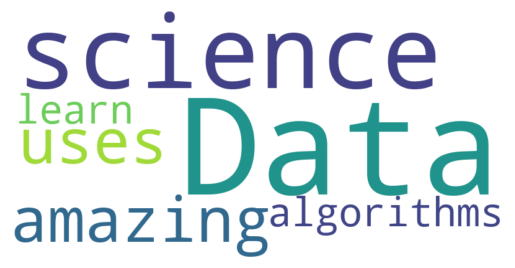

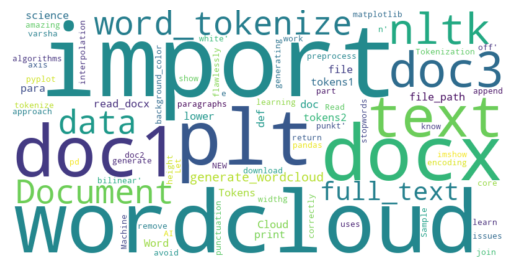

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
import pandas as pd
# Sample Documents
doc1 = "Data science is amazing. It uses algorithms to learn from data."
doc2 = "Machine learning is a core part of AI and data science."

with open("txt1.txt",'r',encoding='utf-8') as f1:
    doc3=f1.read()

# Tokenization
tokens1 = word_tokenize(doc1.lower())
tokens2 = word_tokenize(doc3.lower())
print("Tokens from doc1:", tokens1)
print("Tokens from doc2:", tokens2)

# Word Cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(doc1)
generate_wordcloud(doc3)



Image Preprocessing and Classification

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    'C:/Users/gokul/PycharmProjects/Devi/pokemon',  # Replace with your dataset path
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'C:/Users/gokul/PycharmProjects/Devi/pokemon',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(train_data, validation_data=val_data, epochs=5)

# Evaluation
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Found 8 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


C:\Users\gokul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.7607 - val_accuracy: 0.0000e+00 - val_loss: 2.4857
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step - accuracy: 0.5000 - loss: 0.9134 - val_accuracy: 1.0000 - val_loss: 0.0852
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8750 - loss: 0.2647 - val_accuracy: 1.0000 - val_loss: 0.0313
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 0.1331 - val_accuracy: 1.0000 - val_loss: 0.0497
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 0.0837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0837
Validation Accuracy: 100.00%
